In [1]:
import pandas as pd
import json
from utils import extract_party_table

with open("../data/party_url.json", "r") as f:
    party_url_map = json.load(f)


In [2]:
import pandas as pd
import requests


# # Read the HTML content from the file
# with open('../data/bjp.html', 'r', encoding='utf-8') as file:
#     html_content = file.read()
final_df = pd.DataFrame()
for party_name in party_url_map:
    # URL of the HTML pa"ge
    party_url = party_url_map[party_name]
    # Send a GET request to the URL
    response = requests.get(party_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Get the HTML content
        html_content = response.text
    else:
        print(f"Failed to retrieve HTML content. Status code: {response.status_code}")

    combined_df = extract_party_table(html_content)
    combined_df["Party Name"] = [party_name] * len(combined_df)
    final_df = pd.concat([final_df, combined_df], ignore_index=True)

In [3]:
final_df["Parliamentary Constituency"].value_counts()

Parliamentary Constituency
VIRUDHUNAGAR(34)      2
Anakapalle(5)         1
Ghosi(70)             1
Ambedkar Nagar(55)    1
Shrawasti(58)         1
                     ..
Kaiserganj(57)        1
Baharaich(56)         1
Phulpur(51)           1
Hamirpur(47)          1
Ladakh(1)             1
Name: count, Length: 541, dtype: int64

In [4]:
df= final_df.sort_values(by="% Margin", ascending=True)[:100]

In [5]:
df

,S.No,Parliamentary Constituency,Leading Candidate,Total Votes,Margin,% Margin,Party Name
29,30,Banaskantha(2),DR. REKHABEN HITESHBHAI CHAUDHARI,452117,39,0.008626,Bharatiya Janata Party - BJP
116,117,Beed(39),PANKAJA GOPINATHRAO MUNDE,123135,249,0.202217,Bharatiya Janata Party - BJP
192,193,Kanthi(31),ADHIKARI SOUMENDU,102970,225,0.218510,Bharatiya Janata Party - BJP
371,37,Mirzapur(79),RAMESH CHAND BIND,226089,529,0.233979,Samajwadi Party - SP
473,7,Satara(45),SHASHIKANT JAYVANTRAO SHINDE,308390,784,0.254224,Nationalist Congress Party – Sharadchandra Paw...
...,...,...,...,...,...,...,...
464,9,Shirdi (38),BHAUSAHEB RAJARAM WAKCHAURE,380759,31464,8.263495,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT
461,6,Mumbai North East(28),SANJAY DINA PATIL,280071,23218,8.290041,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT
79,80,BHIND(2),SANDHYA RAY,422042,35500,8.411485,Bharatiya Janata Party - BJP
23,24,Begusarai(24),GIRIRAJ SINGH,375030,31633,8.434792,Bharatiya Janata Party - BJP


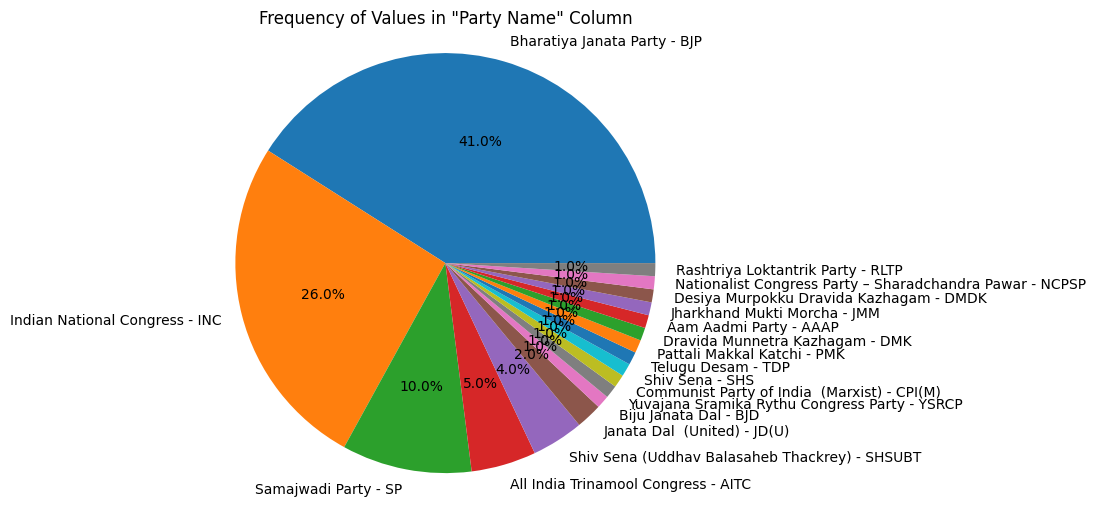

In [6]:
import matplotlib.pyplot as plt
column_name = "Party Name"

value_counts = df[column_name].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Ensure the pie chart is circular
ax.set_title(f'Frequency of Values in "{column_name}" Column')
plt.show()